# Machine Learning Practice

We will start by predicting whether a bank note is authentic or fraudulent based on measurements of four attributes: the variance of the image wavelet transformed image, skewness, entropy, and curtosis of the image.  We will start by implementing a random forest classifier, then implement other models.  

We will by importing usual libraries:

In [1]:
import numpy as np
import pandas as pd

The measurements for the four attributes and target values are located in `bill_authentication.csv`.  We can read it in using `pandas`:

In [2]:
bill_dataset = pd.read_csv('data/bill_authentication.csv')
bill_dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
bill_dataset.shape

(1372, 5)

So `bill_dataset` has 1372 observations of 5 variables.  In order to use the machine learning classifiers in `sklearn`, we'll first need to separate `bill_dataset` into attribute and target data sets:

In [4]:
bill_dataset_data = bill_dataset.iloc[:, 0:4].values
bill_dataset_data.shape

(1372, 4)

In [5]:
bill_dataset_data[:, 0:10]

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [6]:
bill_dataset_targets = bill_dataset.iloc[:, 4].values
bill_dataset_targets.shape

(1372,)

In [7]:
bill_dataset_targets[:]

array([0, 0, 0, ..., 1, 1, 1])



Before we can put our data into any machine learning algorithm, it is generally good practice to normalize the data.  Most classifiers/algorithms won't work nicely without first normalizing the data; as an example, the k-means clustering algorithm calculates the Euclidean distance between points.  If the features of the data set have widely different ranges, then features having a wider range will contribute much more heavily to classification.  Normalizing the data to the same range makes it so that all features contribute an equal amount to classification.  You can read more about data normalization [here](https://en.wikipedia.org/wiki/Feature_scaling)

*(There may be circumstances where you do want to keep a wider range of values for a particular feature to emphasize its importance.  This sort of decision is informed by domain knowledge.)*

We can normalize data using the `scale` package from `sklearn.preprocessing`:

In [8]:
from sklearn.preprocessing import scale
bill_dataset_data = scale(bill_dataset_data)
bill_dataset_data[:, :10]

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

We'll now separate the data into training and testing data sets using `train_test_split` from `sklearn.model_selection`:

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    bill_dataset_data, bill_dataset_targets, test_size = 0.2, random_state = 489)

We can now train the Random Forest algorithm (you can read about the parameters of `RandomForestClassifier` [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):

In [10]:
from sklearn.ensemble import RandomForestClassifier

random_forest_predictor = RandomForestClassifier(n_estimators = 20, random_state = 489)
random_forest_predictor.fit(x_train, y_train)
y_pred_random_forest = random_forest_predictor.predict(x_test)

/Users/pvillanueva13/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Now we want to evaluate how well this algorithm did.  `sklearn` has several ways to measure the effectiveness of an algorithm, and we'll explore those shortly, but I like to use this confusion matrix function found on `sklearn`'s forum:

In [11]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

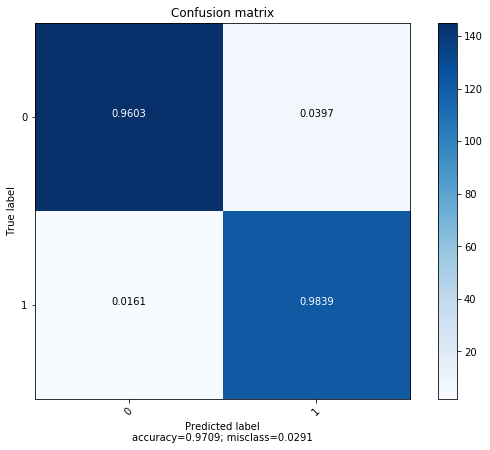

In [12]:
%matplotlib inline
from sklearn.metrics import confusion_matrix

labels = [0, 1]
random_forest_cm = confusion_matrix(y_test, y_pred_random_forest, labels)

    
plot_confusion_matrix(random_forest_cm, labels)

We can also get other performance metrics from `sklearn.metrics`:

In [13]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred_random_forest))  
print("Accuracy of the random forest model is {:.4f}".format(
    accuracy_score(y_test, y_pred_random_forest))) 

             precision    recall  f1-score   support

          0       0.99      0.96      0.97       151
          1       0.95      0.98      0.97       124

avg / total       0.97      0.97      0.97       275

Accuracy of the random forest model is 0.9709


A brief description of the above metrics:

* **Precision** is the proportion of positive identifications that are actually correct.  In other words, $$\textbf{Precision} = \frac{TP}{TP + FP},$$ where $TP$ and $FP$ is the number of true an false positives, respectively.
* **Recall** is the number of true positives that were actually found.  Mathematically, recall is defined as $$\textbf{Recall} = \frac{TP}{TP + FN},$$ where $FN$ is the number of false negatives.  You can read more about precision and recall [here](https://en.wikipedia.org/wiki/Precision_and_recall)
* When your classifier identifies an instance as positive, you want to know that it has been correctly identified as positive (precision).  Also, you want to know that your classifier is finding as many positive instances as possible and not misclassifying positive instances as negative (recall).  Hence, the **f1-score** is a combination of both precision and recall and is calculated as the harmonic mean of the two: $$F_1 = \bigg(\frac{\textbf{precision}^{-1} + \textbf{recall}^{-1}}{2}\bigg)^{-1} = 2 \bigg(\frac{\textbf{precision}\cdot\textbf{recall}}{\textbf{precision} + \textbf{recall}}\bigg)$$
* **Support** is the number of occurrences of each class.  That is, there are 151 negative (or authentic) bills and 124 positive (or fraudulent) bills in our data set.
* **Accuracy** is the total number of correct predictions on the entire data set.  So, if $D$ is your data set, $$\textbf{Accuracy} = \bigg(\frac{TN + TP}{|D|}\bigg)$$.

Note that, depending on your problem, you may place more importance on recall than precision or vice versa.  For instance, if you're designing a classifier to identify cancer, you want your algorithm to have high recall since you don't want to misdiagnose a cancer patient as a healthy one.  On the other hand, if you're designing a spam filter, you might place more value on precision so that you don't misclassify important email as spam. 

So the random forest seemed pretty good for this data set, but let's try another machine learning algorithm.  We can use the sklearn algorithm map to help us decide another appropriate classifier to use:

![alt-text](https://github.com/pommevilla/bcb.fall2018.advanced.python/raw/61e1e32af9e5e9cff0d001a4d6124cba03e3bb43/lessons/images/ml_map.png)

If we follow the map, the first suggestion we reach is linear SVC, or support vector machines.  You can read more about the algorithm [here](https://en.wikipedia.org/wiki/Support_vector_machine) and see the documentation for the sklearn implementation [here](https://scikit-learn.org/stable/modules/svm.html#classification).  Briefly, a SVM separates the data into categories via a hyperplane so that future data points are classified according to which side of the hyperplane they fall on.

Let's go ahead and implement the SVM for this data set.